In [1]:
# please uncomment and run the next line if yellowbrick library is not previously installed
!pip install yellowbrick

     ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
     - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
     - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
     ---- -------------------------------- 30.7/282.6 kB 217.9 kB/s eta 0:00:02
     ----- ------------------------------- 41.0/282.6 kB 219.4 kB/s eta 0:00:02
     ------------ ------------------------ 92.2/282.6 kB 403.5 kB/s eta 0:00:01
     -------------------------------- --- 256.0/282.6 kB 983.0 kB/s eta 0:00:01
     ------------------------------------ 282.6/282.6 kB 969.3 kB/s eta 0:00:00


In [4]:


# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()


# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [5]:
data = pd.read_csv("./data_add_nik.csv")
data.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,4.8,41
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,3.3,24
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,2.6,37
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,4.1,35
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,3.5,72


In [6]:
data.shape

(3268, 8)

In [7]:
data.sample(10, random_state=1)

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
255,Women's adidas Originals POD-S3.1 Shoes,CG6188,13999,6999,50,Adidas ORIGINALS,3.3,8
1551,Men's adidas Originals Superstar Pure Shoes,FV3013,11999,11999,0,Adidas ORIGINALS,3.9,10
1352,Men's adidas Originals Superstar Shoes,FV2806,7999,7999,0,Adidas ORIGINALS,4.4,42
1060,Men's adidas Football Nemeziz 19.3 Indoor Shoes,F34411,5999,3599,40,Adidas SPORT PERFORMANCE,4.5,75
808,Men's adidas Sport Inspired Court 80s Shoes,EE9676,5999,3599,40,Adidas CORE / NEO,4.5,55
836,Men's adidas Running Stargon 1.0 Shoes,CM4935,4799,3839,20,Adidas CORE / NEO,3.5,21
2107,Men's adidas Originals Yung-96 Chasm Shoes,EE7238,7999,4799,40,Adidas ORIGINALS,3.0,62
3002,Nike SB Air Max Stefan Janoski 2,AQ7477-009,0,9995,0,Nike,2.6,11
2329,Men's adidas Originals Rivalry Low Shoes,FV4287,10999,10999,0,Adidas ORIGINALS,2.8,8
602,Men's adidas Sport Inspired Lite Racer RBN Shoes,F36642,5599,3919,30,Adidas CORE / NEO,3.0,56


In [8]:
df = data.copy()

In [10]:
# fixing the column names
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.columns

Index(['product_name', 'product_id', 'listing_price', 'sale_price', 'discount',
       'brand', 'rating', 'reviews'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268 entries, 0 to 3267
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_name   3268 non-null   object 
 1   product_id     3268 non-null   object 
 2   listing_price  3268 non-null   int64  
 3   sale_price     3268 non-null   int64  
 4   discount       3268 non-null   int64  
 5   brand          3268 non-null   object 
 6   rating         3268 non-null   float64
 7   reviews        3268 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 204.4+ KB


In [12]:
# drop product_id column    
df.drop(columns="product_id", inplace=True)

In [13]:
# lets check the duplicate observations
df.duplicated().sum()

117

In [15]:
# remove duplicate observations
df.drop_duplicates(inplace=True)

df.duplicated().sum()

0

In [24]:
# analyze the numerical columns
df.describe()

,listing_price,sale_price,discount,rating,reviews
count,3151.000000,3151.000000,3151.000000,3151.000000,3151.000000
mean,7045.960330,5983.166931,27.860997,3.285687,41.891146
std,4652.089511,4173.708897,22.442753,1.371611,31.283464
min,0.000000,449.000000,0.000000,0.000000,0.000000
25%,4599.000000,2999.000000,0.000000,2.600000,12.000000
50%,5999.000000,4599.000000,40.000000,3.600000,40.000000
75%,8999.000000,7799.000000,50.000000,4.400000,69.000000
max,29999.000000,36500.000000,60.000000,5.000000,223.000000


In [27]:
# check how many list price values are 0
df[df.listing_price == 0]

,product_name,listing_price,sale_price,discount,brand,rating,reviews
2625,Nike Air Force 1 '07 Essential,0,7495,0,Nike,0.0,0
2626,Nike Air Force 1 '07,0,7495,0,Nike,0.0,0
2627,Nike Air Force 1 Sage Low LX,0,9995,0,Nike,0.0,0
2628,Nike Air Max Dia SE,0,9995,0,Nike,0.0,0
2629,Nike Air Max Verona,0,9995,0,Nike,0.0,0
...,...,...,...,...,...,...,...
3254,Nike Mercurial Vapor 13 Club MG,0,4995,0,Nike,0.0,0
3257,Air Jordan 5 Retro,0,15995,0,Nike,3.3,3
3260,Nike Tiempo Legend 8 Academy TF,0,6495,0,Nike,0.0,0
3262,Nike React Metcon AMP,0,13995,0,Nike,3.0,1


In [28]:
# check the summary statistics of the list price = 0
df[df.listing_price == 0].describe()

,listing_price,sale_price,discount,rating,reviews
count,336.0,336.000000,336.0,336.000000,336.000000
mean,0.0,11203.050595,0.0,2.797619,8.261905
std,0.0,4623.825788,0.0,2.150445,19.708393
min,0.0,1595.000000,0.0,0.000000,0.000000
25%,0.0,7995.000000,0.0,0.000000,0.000000
50%,0.0,10995.000000,0.0,3.950000,1.000000
75%,0.0,13995.000000,0.0,4.700000,6.000000
max,0.0,36500.000000,0.0,5.000000,223.000000


In [29]:
df.loc[df.listing_price == 0, "listing_price"] = df.loc[df.listing_price == 0, "sale_price"].values

In [33]:
df["listing_price"].describe()

count     3151.000000
mean      8240.573151
std       4363.018245
min        899.000000
25%       4999.000000
50%       7599.000000
75%      10995.000000
max      36500.000000
Name: listing_price, dtype: float64

In [34]:
# check for missing values
df.isnull().sum()

product_name     0
listing_price    0
sale_price       0
discount         0
brand            0
rating           0
reviews          0
dtype: int64

In [35]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

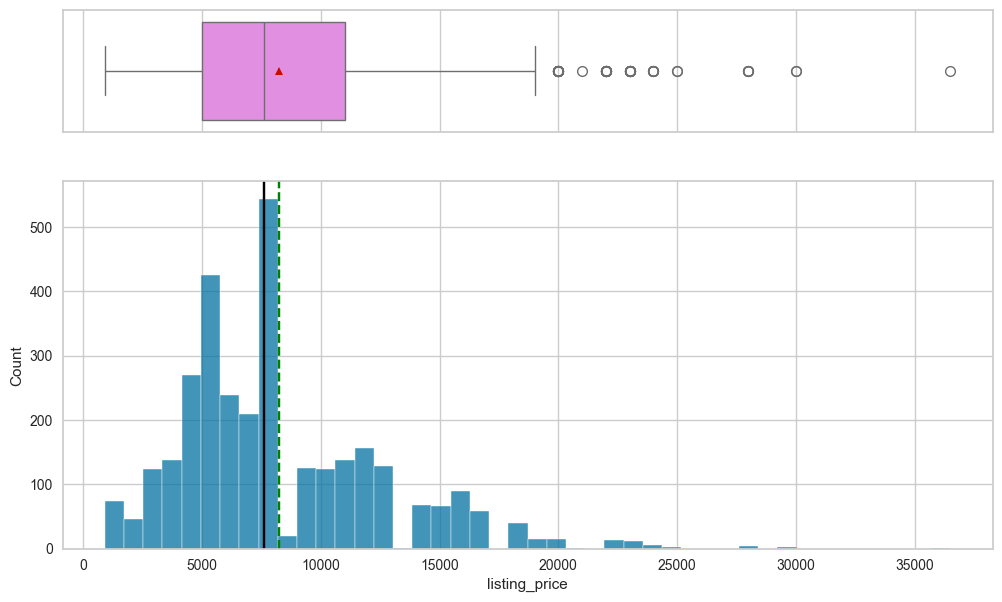

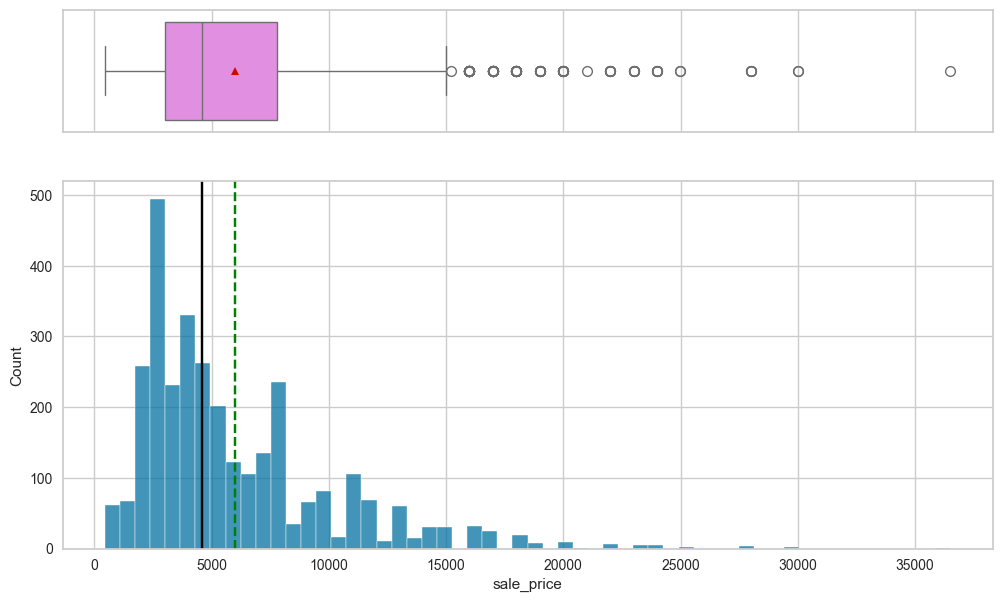

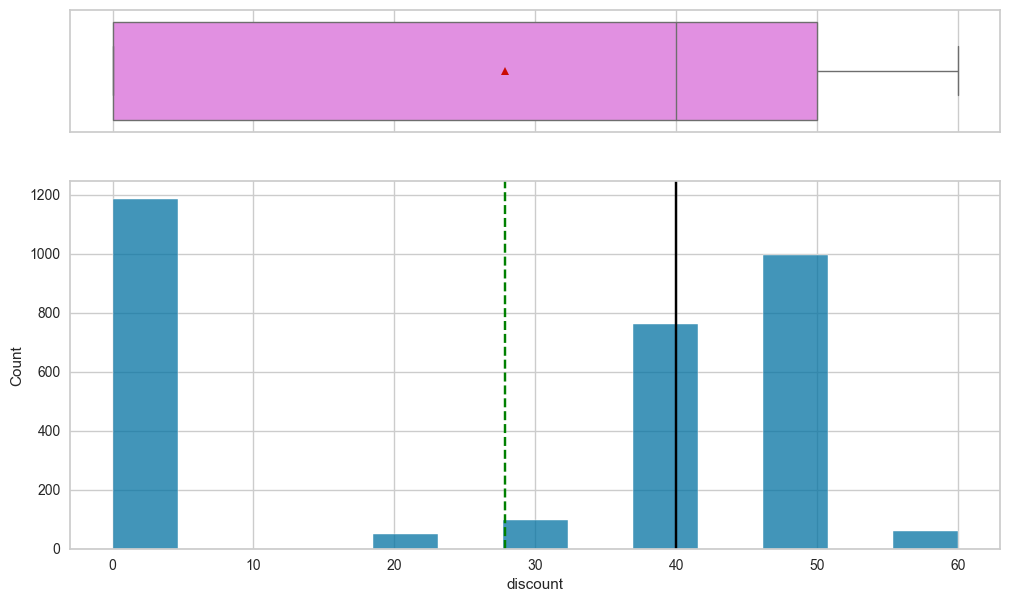

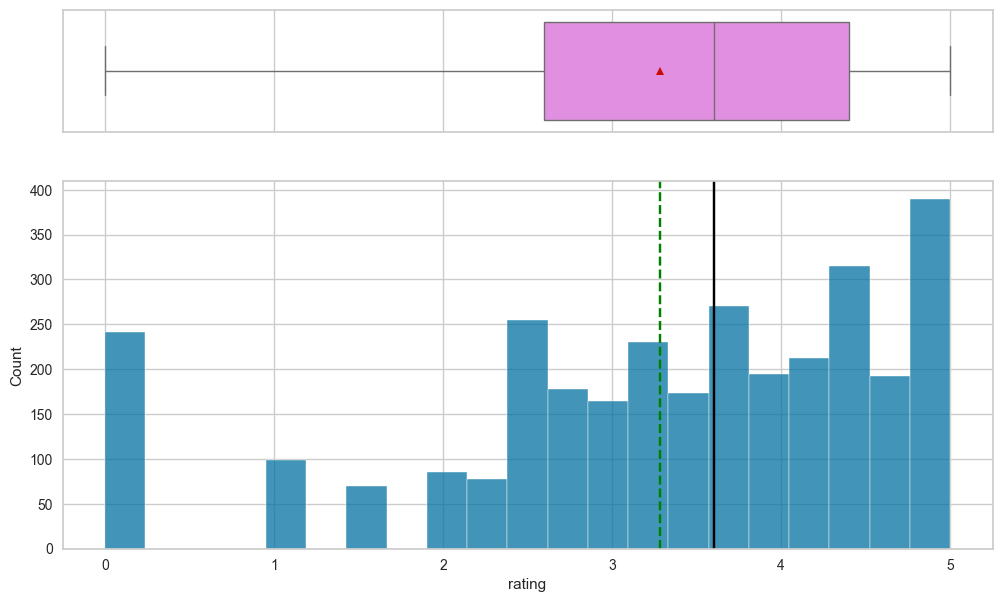

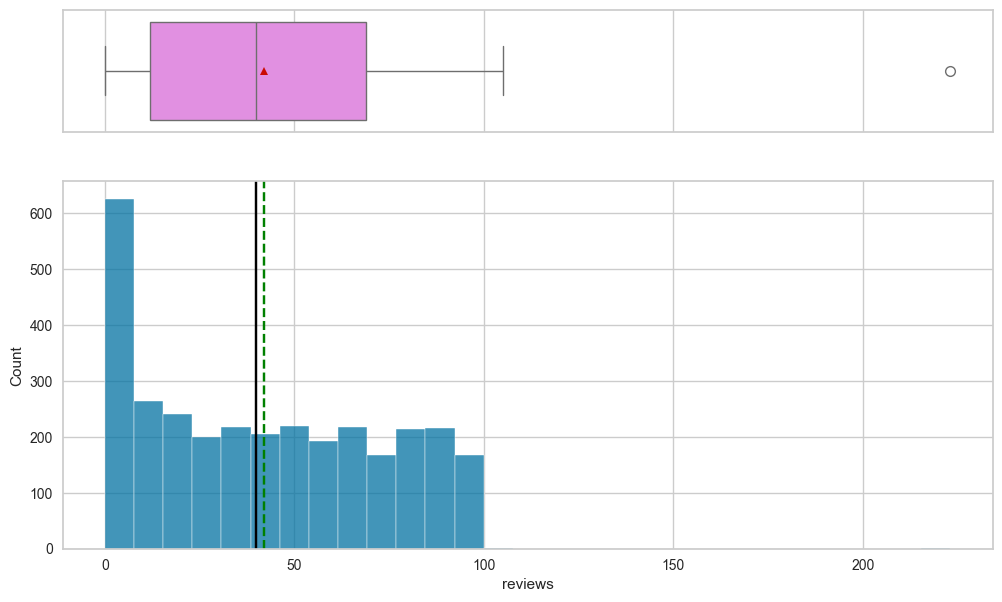

In [38]:
# selecting numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# plotting the numerical columns
for col in num_cols:
    histogram_boxplot(df, col)

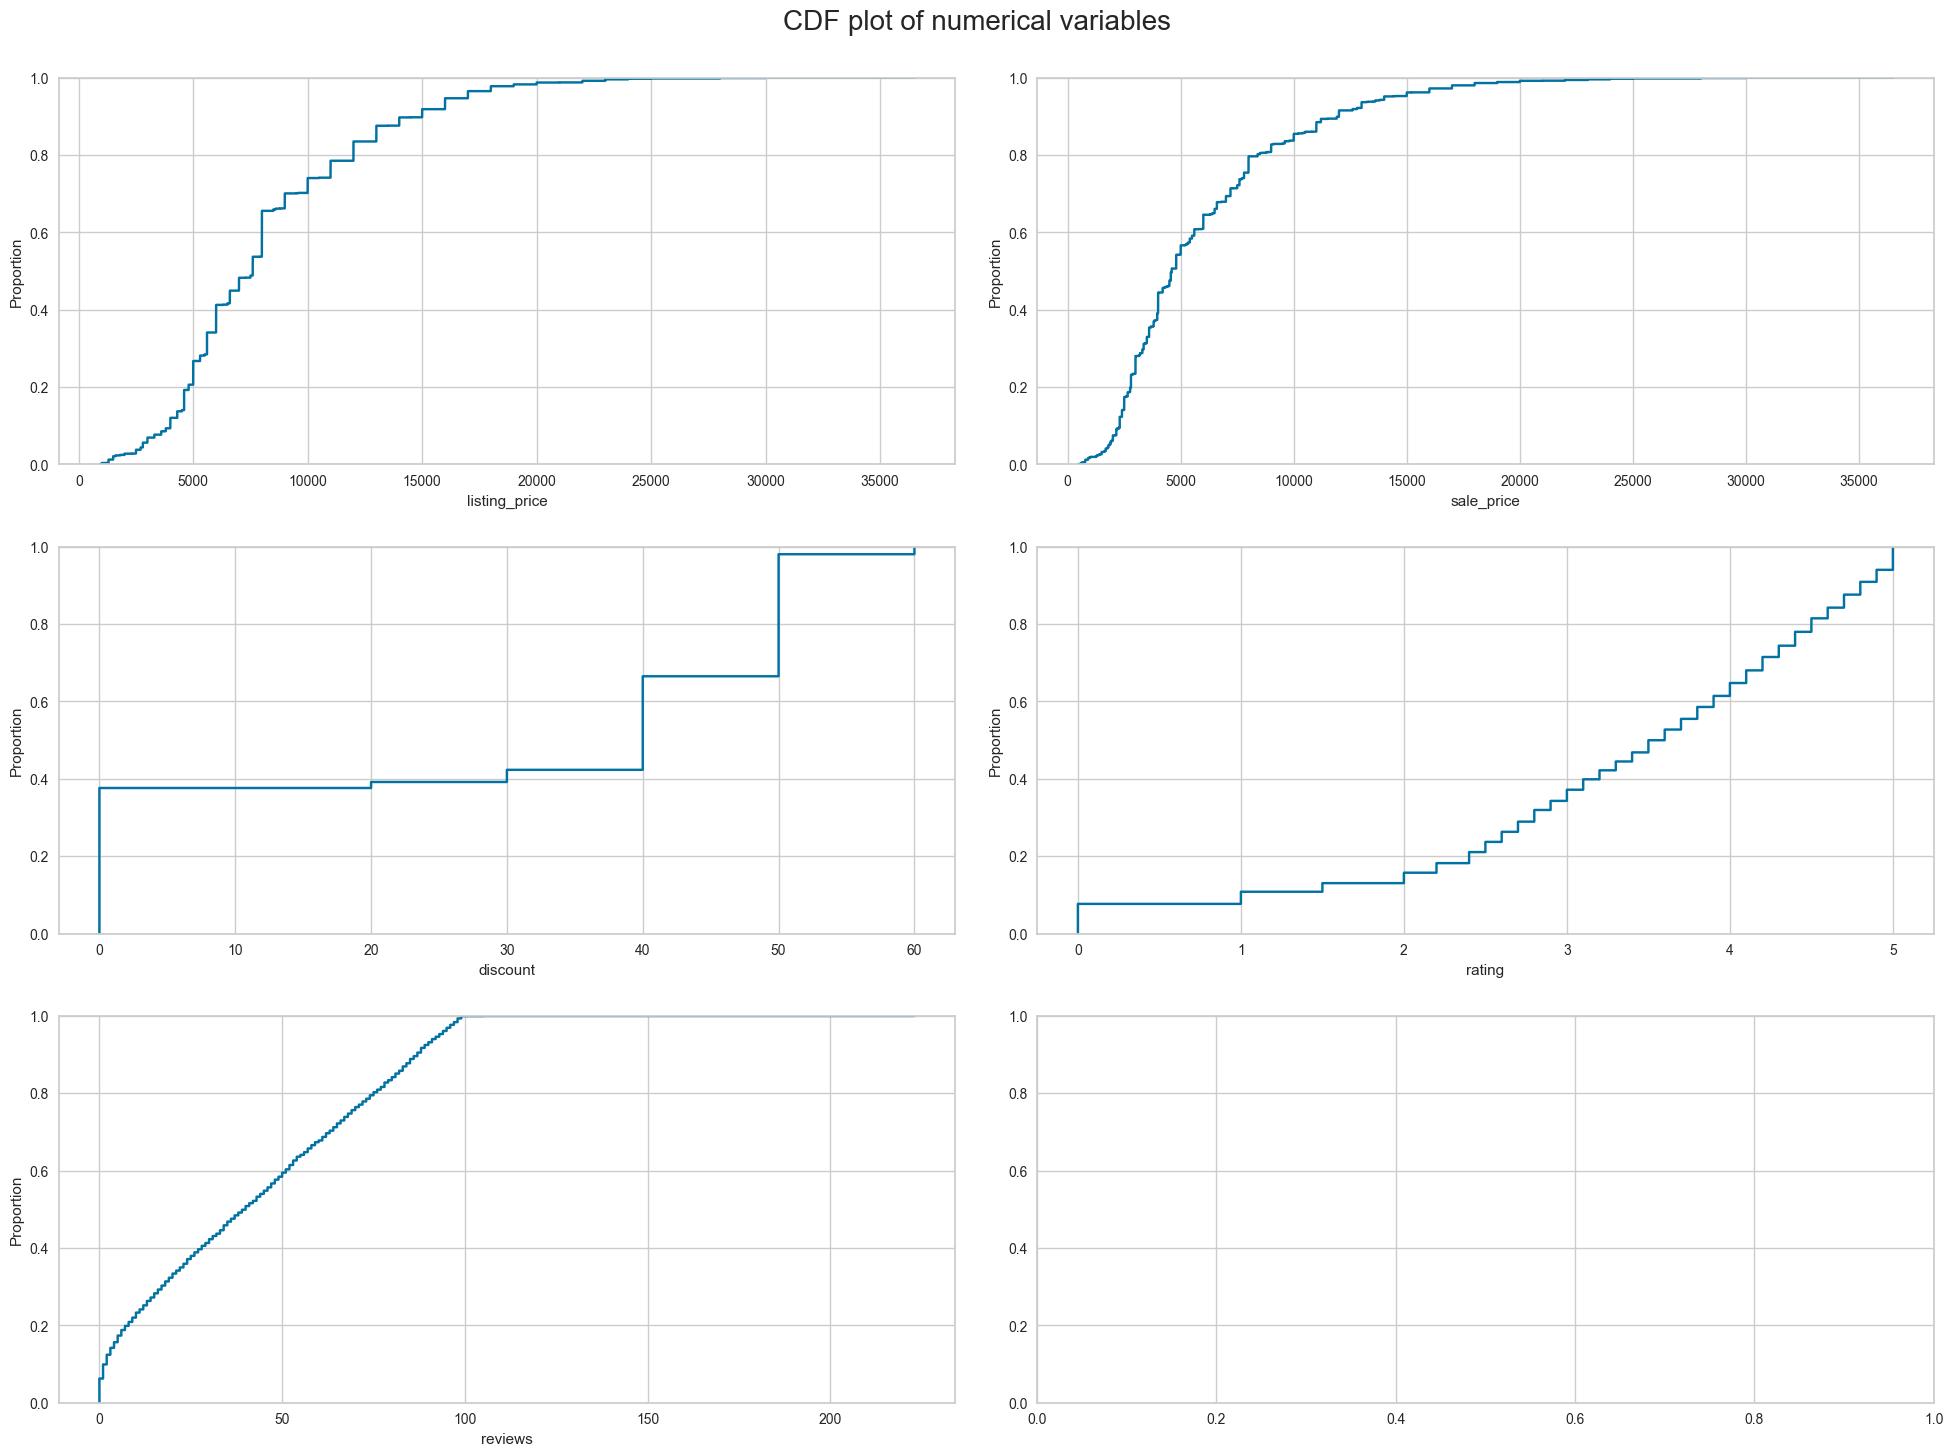

In [41]:
fig, axes = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle("CDF plot of numerical variables", fontsize=20)
counter = 0
for ii in range(3):
    sns.ecdfplot(ax=axes[ii][0], x=df[num_cols[counter]])
    counter = counter + 1
    if counter != 5:
        sns.ecdfplot(ax=axes[ii][1], x=df[num_cols[counter]])
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)

In [42]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

C:\Users\sethanga\AppData\Local\Temp\ipykernel_72112\1031480784.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


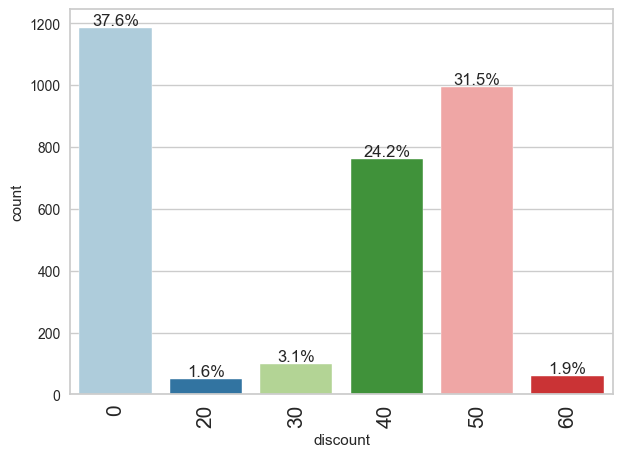

In [43]:
# let's explore discounts further
labeled_barplot(df, "discount", perc=True)

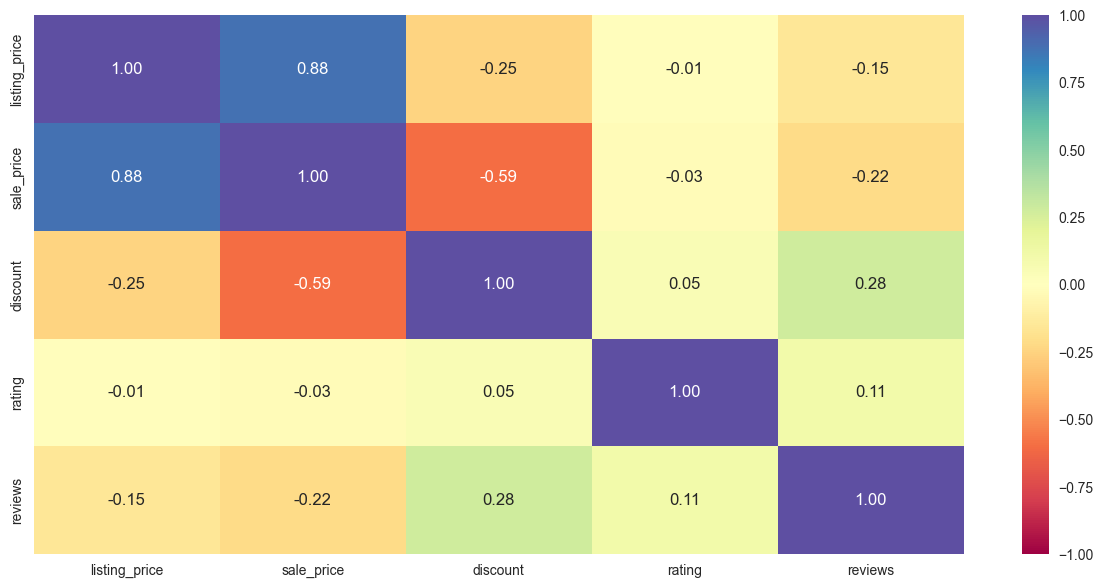

In [45]:
plt.figure(figsize=(15, 7))
sns.heatmap(df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

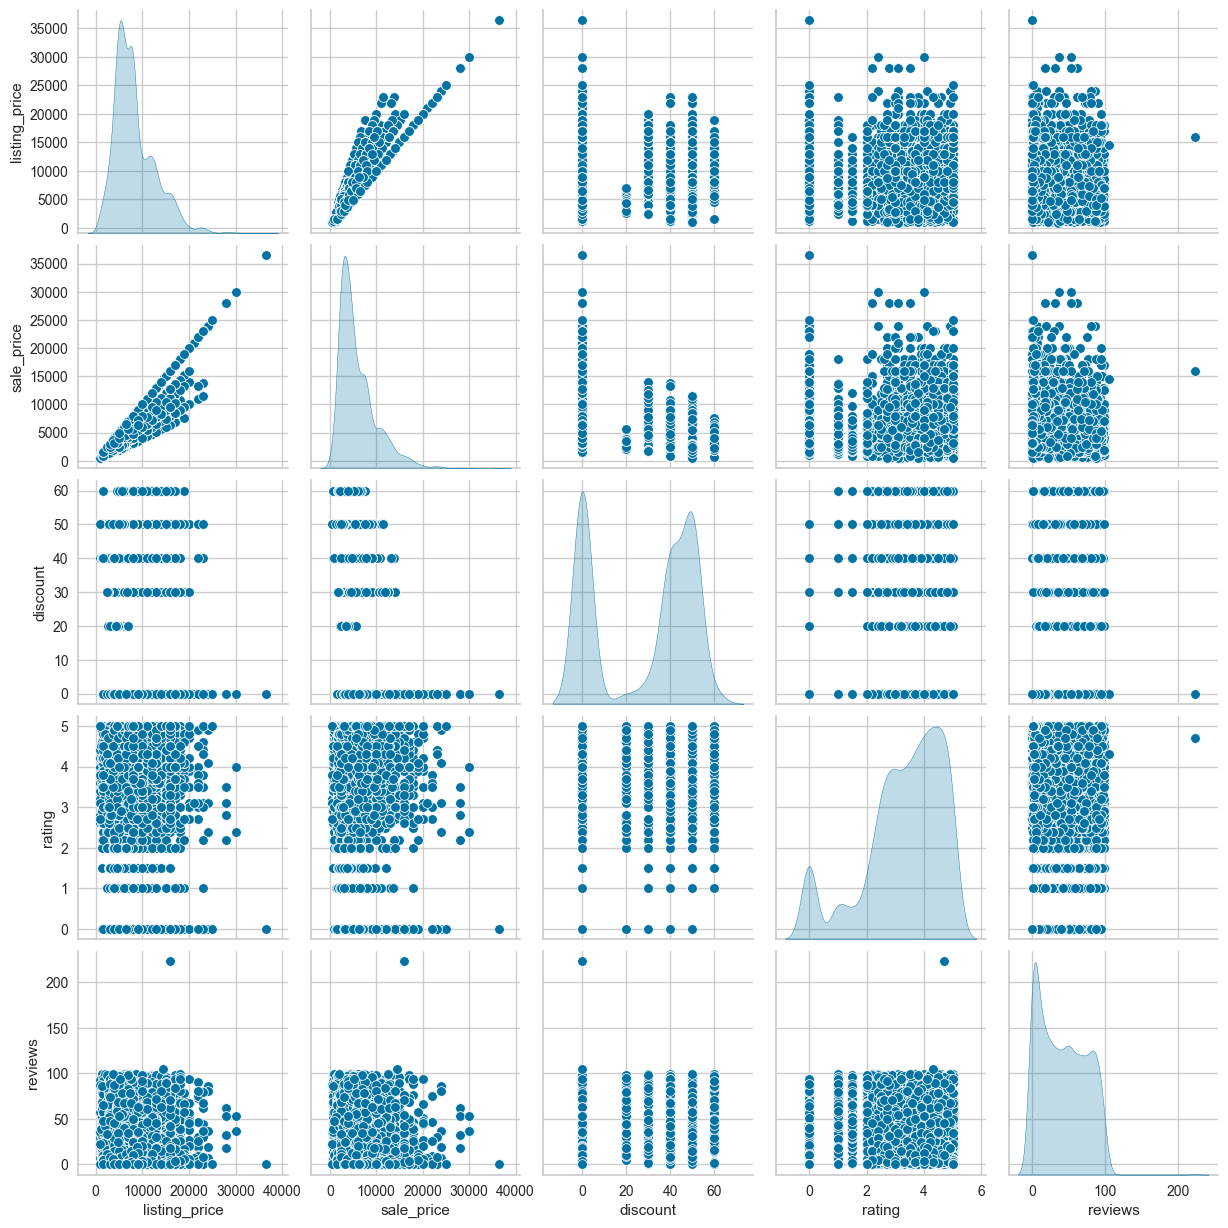

In [46]:
sns.pairplot(data=df[num_cols], diag_kind="kde")
plt.show()

In [50]:
# scaling the data
scaler = StandardScaler()
subset = df[num_cols].copy()
subset_scaled = scaler.fit_transform(subset)
subset_scaled

array([[ 1.54927143,  0.36324375,  0.98662214,  1.10421517, -0.02849068],
       [-0.14707135, -0.52339865,  0.98662214,  0.01043677, -0.57199501],
       [-1.66002572, -1.2902245 ,  0.54097329, -0.49999315, -0.15637405],
       ...,
       [ 1.77759   ,  1.6328198 , -1.2416221 ,  1.25005229, -1.30732439],
       [ 2.00682551,  2.63879947, -1.2416221 ,  0.52086669, -1.21141186],
       [ 0.17294142,  0.07520478, -1.2416221 , -2.39587571, -1.33929524]])

In [52]:
 


subset_scaled_df = pd.DataFrame(subset_scaled, columns=num_cols)
subset_scaled_df.head()

,listing_price,sale_price,discount,rating,reviews
0,1.549271,0.363244,0.986622,1.104215,-0.028491
1,-0.147071,-0.523399,0.986622,0.010437,-0.571995
2,-1.660026,-1.290225,0.540973,-0.499993,-0.156374
3,-0.284613,-0.595289,0.986622,0.593785,-0.220316
4,-0.055377,-0.475472,0.986622,0.156274,0.962605


c:\Users\sethanga\AppData\Local\anaconda3\envs\Learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sethanga\AppData\Local\anaconda3\envs\Learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sethanga\AppData\Local\anaconda3\envs\Learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of Clusters: 1 	Average Distortion: 2.0907211006458244
Number of Clusters: 2 	Average Distortion: 1.712012896274925
Number of Clusters: 3 	Average Distortion: 1.5550101161332088


c:\Users\sethanga\AppData\Local\anaconda3\envs\Learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sethanga\AppData\Local\anaconda3\envs\Learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of Clusters: 4 	Average Distortion: 1.4455035604686661
Number of Clusters: 5 	Average Distortion: 1.3083161318120873


c:\Users\sethanga\AppData\Local\anaconda3\envs\Learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of Clusters: 6 	Average Distortion: 1.2304110495356344
Number of Clusters: 7 	Average Distortion: 1.1691796198096012


c:\Users\sethanga\AppData\Local\anaconda3\envs\Learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sethanga\AppData\Local\anaconda3\envs\Learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of Clusters: 8 	Average Distortion: 1.1009935010057939


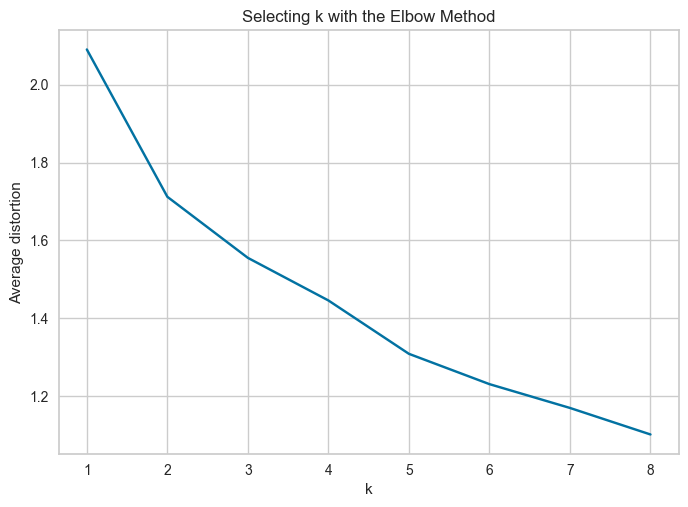

In [55]:
clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average distortion")
plt.title("Selecting k with the Elbow Method")
plt.show()

In [81]:
subset_scaled_df

,listing_price,sale_price,discount,rating,reviews,K_means_segments
0,1.549271,0.363244,0.986622,1.104215,-0.028491,2
1,-0.147071,-0.523399,0.986622,0.010437,-0.571995,2
2,-1.660026,-1.290225,0.540973,-0.499993,-0.156374,2
3,-0.284613,-0.595289,0.986622,0.593785,-0.220316,2
4,-0.055377,-0.475472,0.986622,0.156274,0.962605,2
...,...,...,...,...,...,...
3146,-0.400147,0.122652,-1.241622,-2.395876,-1.339295,0
3147,1.319119,1.919900,-1.241622,-0.208319,-1.307324,3
3148,1.777590,1.632820,-1.241622,1.250052,-1.307324,3
3149,2.006826,2.638799,-1.241622,0.520867,-1.211412,3


c:\Users\sethanga\AppData\Local\anaconda3\envs\Learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 2, the silhouette score is 0.33477783024100377)


c:\Users\sethanga\AppData\Local\anaconda3\envs\Learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 3, the silhouette score is 0.29744330547715736)


c:\Users\sethanga\AppData\Local\anaconda3\envs\Learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 4, the silhouette score is 0.3064880765192677)


c:\Users\sethanga\AppData\Local\anaconda3\envs\Learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 5, the silhouette score is 0.2703913853941806)


c:\Users\sethanga\AppData\Local\anaconda3\envs\Learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 6, the silhouette score is 0.2811661692670507)


c:\Users\sethanga\AppData\Local\anaconda3\envs\Learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sethanga\AppData\Local\anaconda3\envs\Learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 7, the silhouette score is 0.2831011550422736)
For n_clusters = 8, the silhouette score is 0.29268643537073114)


c:\Users\sethanga\AppData\Local\anaconda3\envs\Learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 9, the silhouette score is 0.28600405822844854)


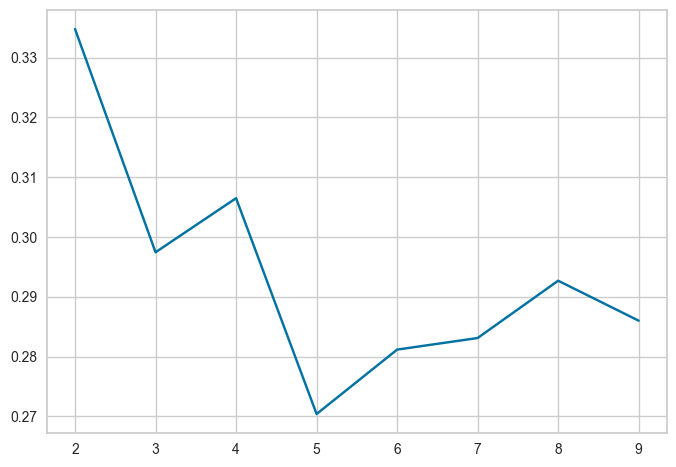

In [56]:
# calculate the silhoutee score
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

c:\Users\sethanga\AppData\Local\anaconda3\envs\Learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


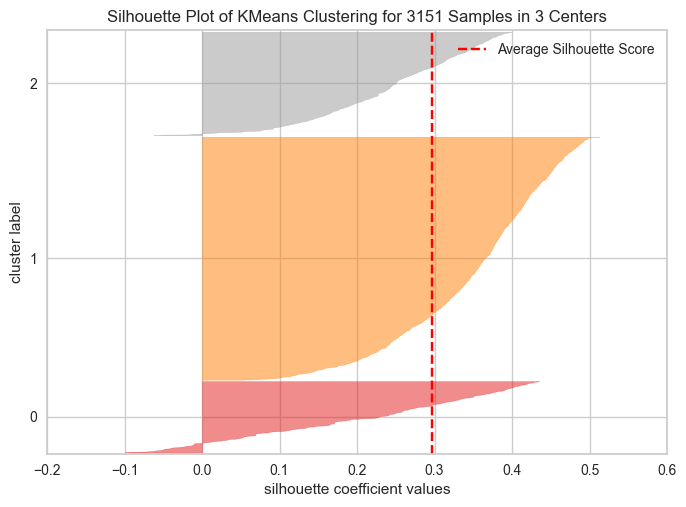

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 3151 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [57]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

c:\Users\sethanga\AppData\Local\anaconda3\envs\Learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


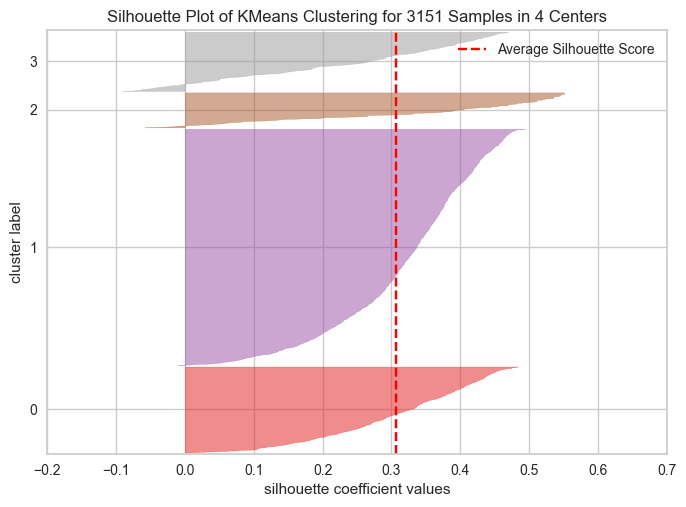

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 3151 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [58]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

In [59]:
# let's take 4 as number of clusters
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(subset_scaled_df)

c:\Users\sethanga\AppData\Local\anaconda3\envs\Learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=0)

In [60]:
# adding kmeans cluster labels to the original and scaled dataframes

df["K_means_segments"] = kmeans.labels_
subset_scaled_df["K_means_segments"] = kmeans.labels_

In [72]:
cluster_profile = (
    df.groupby("K_means_segments")
    .apply(lambda x: x[num_cols].mean())
    .round(2)
)

cluster_profile

,listing_price,sale_price,discount,rating,reviews
K_means_segments,,,,,
0,9726.00,8331.10,7.72,0.26,11.90
1,6629.65,6275.11,0.94,3.80,39.10
2,6801.85,3688.56,45.43,3.39,50.14
3,15711.59,13540.77,9.03,3.93,30.65


In [73]:
cluster_profile["count_in_each_segments"] = (
    df.groupby("K_means_segments")["sale_price"].count().values
)
cluster_profile

,listing_price,sale_price,discount,rating,reviews,count_in_each_segments
K_means_segments,,,,,,
0,9726.00,8331.10,7.72,0.26,11.90,267
1,6629.65,6275.11,0.94,3.80,39.10,663
2,6801.85,3688.56,45.43,3.39,50.14,1787
3,15711.59,13540.77,9.03,3.93,30.65,434


In [75]:
%pip install Jinja2

     ---------------------------------------- 0.0/133.1 kB ? eta -:--:--
     ---------------------------------------- 0.0/133.1 kB ? eta -:--:--
     --- ------------------------------------ 10.2/133.1 kB ? eta -:--:--
     --- ------------------------------------ 10.2/133.1 kB ? eta -:--:--
     -------- ---------------------------- 30.7/133.1 kB 187.9 kB/s eta 0:00:01
     ----------------- ------------------- 61.4/133.1 kB 297.7 kB/s eta 0:00:01
     --------------------------------- -- 122.9/133.1 kB 514.3 kB/s eta 0:00:01
     ------------------------------------ 133.1/133.1 kB 491.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [77]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="red", axis=0)

,listing_price,sale_price,discount,rating,reviews,count_in_each_segments
K_means_segments,,,,,,
0,9726.000000,8331.100000,7.720000,0.260000,11.900000,267
1,6629.650000,6275.110000,0.940000,3.800000,39.100000,663
2,6801.850000,3688.560000,45.430000,3.390000,50.140000,1787
3,15711.590000,13540.770000,9.030000,3.930000,30.650000,434


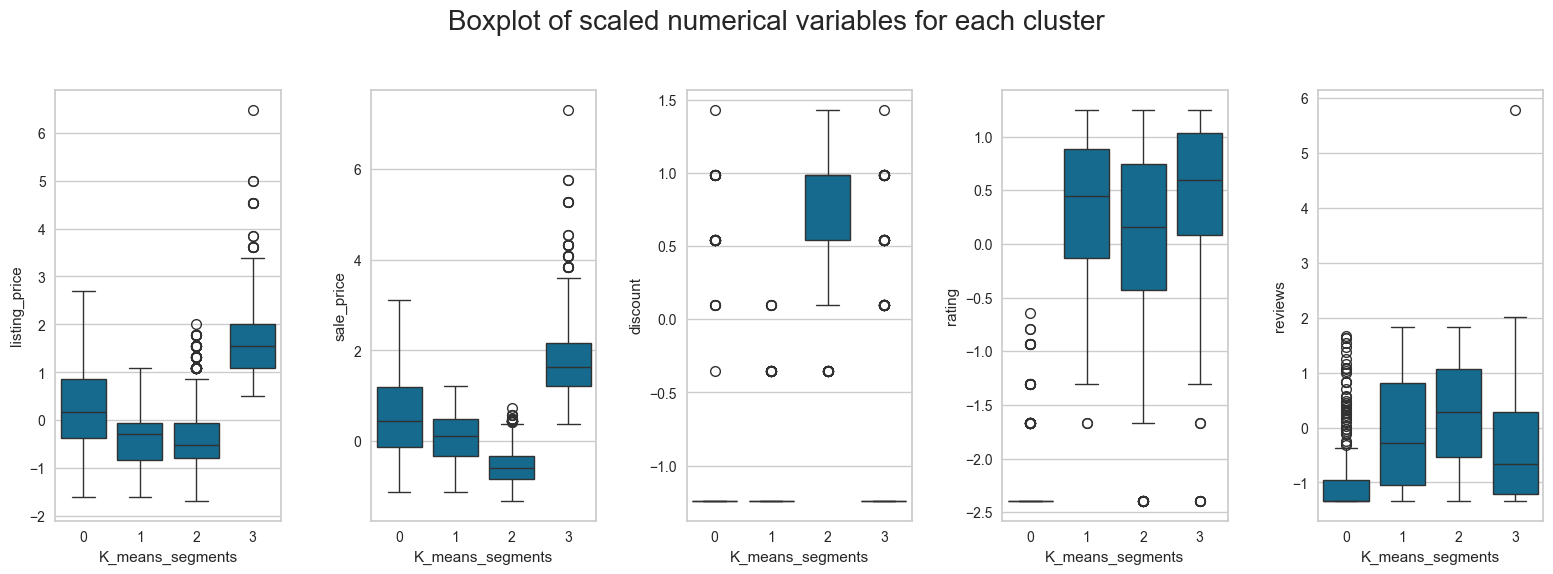

In [79]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii],
        y=subset_scaled_df[num_cols[counter]],
        x=subset_scaled_df["K_means_segments"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

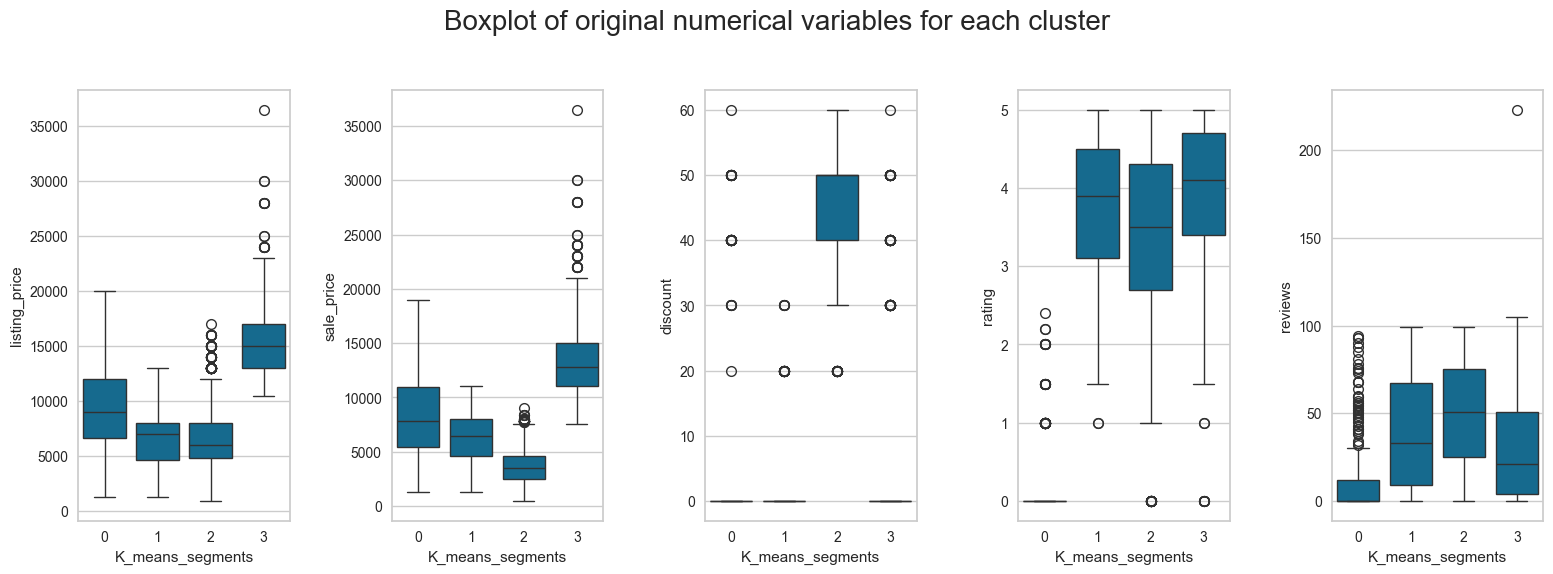

In [80]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=df[num_cols[counter]], x=df["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)